In [9]:
import time
# for array operations
import numpy as np
# iterate through directories and show image paths
import os, shutil
# display images
import matplotlib.pyplot as plt
# image operations
import cv2

# !pip install opencv-contrib-python

# Import data

In [10]:
# specify data directories
test_dir = r'\Users\akams\Documents\Flatiron\Phase_4_project\chest_xray\test'
train_dir = r'\Users\akams\Documents\Flatiron\Phase_4_project\chest_xray\train'
val_dir = r'\Users\akams\Documents\Flatiron\Phase_4_project\chest_xray\val'

# specify categoies
test_data = ['NORMAL', 'PNEUMONIA']
train_data = ['NORMAL', 'PNEUMONIA']
val_data = ['NORMAL', 'PNEUMONIA']

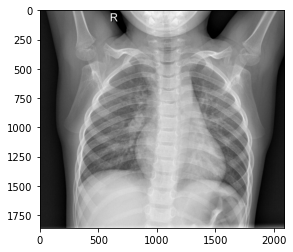

In [14]:
# loop through directory paths to display an image
for im in train_data:
    path = os.path.join(train_dir, im) # path to xray images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

# EDA

# Model

In [48]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [49]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 585 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 4101 images belonging to 2 classes.


In [50]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [51]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [52]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(200, 12288)


In [53]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [54]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
17/17 [==============================] - 1s 22ms/step - loss: 0.6934 - accuracy: 0.6442 - val_loss: 0.6793 - val_accuracy: 0.7300
Epoch 2/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.7276 - val_loss: 0.6651 - val_accuracy: 0.7300
Epoch 3/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6607 - accuracy: 0.7377 - val_loss: 0.6529 - val_accuracy: 0.7300
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.7205 - val_loss: 0.6425 - val_accuracy: 0.7300
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6373 - accuracy: 0.7421 - val_loss: 0.6337 - val_accuracy: 0.7300
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6306 - accuracy: 0.7336 - val_loss: 0.6261 - val_accuracy: 0.7300
Epoch 7/50
17/17 [==============================] - 0s 10ms/step - loss: 0.6223 - accuracy: 0.7358 - val_loss: 0.6197 - val_accuracy: 0.7300
Epoch 8/50
17/17

In [56]:
results_train = model.evaluate(train_img, train_y)

17/17 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7399


In [57]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7056


In [58]:
results_train

[0.5732227563858032, 0.7398523688316345]

In [59]:
results_test

[0.6086954474449158, 0.7055555582046509]

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [61]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
17/17 [==============================] - 4s 191ms/step - loss: 0.6761 - acc: 0.5683 - val_loss: 0.6059 - val_acc: 0.7300
Epoch 2/30
17/17 [==============================] - 3s 162ms/step - loss: 0.5920 - acc: 0.7396 - val_loss: 0.5901 - val_acc: 0.7300
Epoch 3/30
17/17 [==============================] - 3s 175ms/step - loss: 0.5633 - acc: 0.7556 - val_loss: 0.5884 - val_acc: 0.7300
Epoch 4/30
17/17 [==============================] - 4s 216ms/step - loss: 0.5892 - acc: 0.7299 - val_loss: 0.5858 - val_acc: 0.7300
Epoch 5/30
17/17 [==============================] - 3s 195ms/step - loss: 0.5915 - acc: 0.7213 - val_loss: 0.5877 - val_acc: 0.7300
Epoch 6/30
17/17 [==============================] - 3s 191ms/step - loss: 0.6015 - acc: 0.7136 - val_loss: 0.5810 - val_acc: 0.7300
Epoch 7/30
17/17 [==============================] - 3s 196ms/step - loss: 0.5949 - acc: 0.7128 - val_loss: 0.5774 - val_acc: 0.7300
Epoch 8/30
17/17 [==============================] - 3s 191ms/step - loss: 0.

In [62]:
results_train = model.evaluate(train_images, train_y)

17/17 [==============================] - 1s 40ms/step - loss: 0.2588 - acc: 0.9096


In [63]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 39ms/step - loss: 0.2762 - acc: 0.9056


In [64]:
results_train

[0.2587908208370209, 0.9095941185951233]

In [65]:
results_test

[0.27621692419052124, 0.9055555462837219]

In [66]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [67]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 585 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 4101 images belonging to 2 classes.


In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [69]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

/Users/alexandrabruno/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
25/25 [==============================] - 33s 1s/step - loss: 0.6712 - acc: 0.5951 - val_loss: 0.5938 - val_acc: 0.7312
Epoch 2/30
25/25 [==============================] - 31s 1s/step - loss: 0.5497 - acc: 0.7779 - val_loss: 0.5750 - val_acc: 0.7475
Epoch 3/30
25/25 [==============================] - 34s 1s/step - loss: 0.6107 - acc: 0.7083 - val_loss: 0.5941 - val_acc: 0.7250
Epoch 4/30
25/25 [==============================] - 35s 1s/step - loss: 0.5629 - acc: 0.7582 - val_loss: 0.5953 - val_acc: 0.7262
Epoch 5/30
25/25 [==============================] - 42s 2s/step - loss: 0.5592 - acc: 0.7573 - val_loss: 0.5889 - val_acc: 0.7300
Epoch 6/30
25/25 [==============================] - 29s 1s/step - loss: 0.5609 - acc: 0.7560 - val_loss: 0.5816 - val_acc: 0.7337
Epoch 7/30
25/25 [==============================] - 29s 1s/step - loss: 0.5944 - acc: 0.7217 - val_loss: 0.5885 - val_acc: 0.7287
Epoch 8/30
25/25 [==============================] - 29s 1s/step - loss: 0.5600 - acc: 0.75

In [70]:
test_x, test_y = next(test_generator)

In [71]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 32ms/step - loss: 0.4856 - acc: 0.7722


In [72]:
results_test

[0.48560404777526855, 0.7722222208976746]